# Machine learning su aplicación en Biología

__Análisis de datos biológicos utilizando métodos de machine learning__

_MeIA_

`2023`

## Artificial neural networks

Las ANN se desarrollaron para simular las redes neuronales o neuronas que constituyen el cerebro humano.


<img src="../imagenes/ANN.png" width="500" height="400"/>
La arquitectura general de las redes neuronales (ANN), consta de tres capas: la capa de entrada, la capa oculta y la capa de salida. 
La capa de entrada alberga las características de entrada. 
La capa intermedia o oculta implica los procesos de cálculo matemático, algunos modelos pueden tener más de una capa oculta.
La ultima capa es la de salida.

<img src="../imagenes/ANN1.png" width="500" height="400"/>
Una neurona simple consiste principalmente de entradas, características, pesos, sesgos y función de activación. Los pesos definen la importancia de las características. La suma de características ponderadas se pasa a una función de activación y se calcula utilizando la siguiente formula
$z=W_1X_1 + W_2X_2 + b$

Donde Ws son los pesos de las características, Xs son las características de entrada y b es el sesgo. El sesgo es un número aleatorio pequeño y se usa para que Z no sea igual a cero para ningún valor de Ws y Xs.

#### Función de activación
La función de activación en una red neuronal determina si una determinada neurona debe 'activarse' o 'no activarse' en función de la suma ponderada 'Z'. Por lo tanto la función de activación mas simple seria $f(z)=1$, si 'Z' es mayor que cero o positivo, y $f(z)=0$ si Z es negativo. 

Esta función es llamada función de paso porque proporciona una salida de 0 o 1. Podemos utilizar otras funciones de activación que retornar otros valores basados en Z a las otras capas en lugar de 1 o 0. Algunos renciones de activación son:

- Función sigmoide que devuelve un valor entre 0 y 1 para cuaquier valor de Z.
- Función Tanh que produce salidad que van de -1 a 1.
- Función ReLU también conocida como unidad lineal rectificadas, y es la más utilizada. Devuelve 0 para valores negativos de Z y el Z si esl valor es positivo.


#### Pasos de la propagación hacia adelante
Los pasos para el cálculo de la salida en función de las características de entrada:
1. A las características de entrada se les asignan pesos
2. Se calcula la suma ponderada de todas las características de entrada con asición del sesgo (es decir Z).
3. El valor Z se pasa a través de la función de activación y devuelve la salida. 

El principal objetivo de las redes neuronales es calcular los pesos apropiados para las características de entrada para obtener una salida. La salida se compara con los valores originales y se calcula un error o una pérdida. A continuación, esta pérdida se hace retroceder para optimizar los pesos. Este proceso de cálculo de la producción, comparación de pérdidas y actualización de los pesos se ejecuta de forma iterativa hasta que alcanzamos una pérdida mínima. Este proceso de minimizar el error se llama descenso de gradiente.

#### Descenso de gradiente

El algoritmo de descenso de gradiente determina cómo se actualiza el peso. Los pesos se actualizan de tal manera que, cada vez, la pérdida se minimice y el modelo así obtenido procure el mínimo error.

### Importamos las librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

### Importamos el dataset

In [3]:
dataset = pd.read_csv('../Datos/heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Dividimos las variables dependientes e independientes

In [4]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

### Escalado de datos
El escalado de datos es una etapa de preprocesamiento esencial establecida antes del entrenamiento de la red neuronal, ya que las grandes variaciones en las distribuciones de parámetros pueden afectar las funciones de activación.

In [5]:
#Utilizamos StandardScaler para escalar los datos 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#El método fit_transform es la combinación de el metodo fit y tranform
#Este método realiza simultáneamente operaciones de ajuste y 
#transforma los datos de entrada y convierte los puntos de datos.
X_norm = sc.fit_transform(X)

In [6]:
#Realizamos la división el dataset en el conjunto 
#de entrenamiento y de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.25, random_state = 0)

### TensorFlow

Utilizaremos la biblioteca Keras, que proporciona APIs para construir las redes neuronales. Este tiene una clase llamada `Sequentia` que puede ser usada para crear las capas de las neuronas. Mientras que las clase `Dense` es usada para construir redes neuronales densamente conectadas, donde cada neurona está conectada con cada una de las otras neurona.

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


2023-06-16 00:46:25.670395: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-16 00:46:25.703226: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Creación de un modelo
Hay dos métodos para la creación de redes neuronales de múltiples capas utilizando la clase `Sequential`. El primero es pasar la lista de capas todas a la vez, y el segundo es agregar capas una por una.

### Modelo - Usando una lista de capas
En esta parte, inicializamos la clase Sequential" y pasamos una lista de objetos "Dense". "Dense" utiliza varios parámetros, por ejemplo "units" que indican el número de neuronas requeridas en la capa respectiva. Ahora crearemos tres capas de la red neuronal y las guardamos como un objeto en la variable model.

In [8]:
#Inicializamos la clase Sequential y pasamos una lista de onjetos Dense.
#Dense utiliza el parametro Units para indicar el número de neuronas
#Creamos las tres capas de la red neuronal y guardamos como un objeto en la variable model.
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=1)
])

### Modelo - Adicionando capas una a una
También podemos agregar capas una por una al objeto modelo usando el método ".add"


In [9]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(1))


### Construcción del modelo

Ahora construiremos un modelo para clasificar el dataset de enfermedades del corazón.

Adicionaremos las tres capas,
En la primera capa utilizamos `unit=13` que es la dimensión de las características de entrada. Además utilizamos `relu`o la función de activación lineal rectificada. Así como, `input_shape` que adopta la dimensión de las características de entrada en este caso 13.

En la última capa, hemos seleccionado la función de activación `sigmoid`, ya que el problema en consideración es un problema de clasificación binaria donde solo tenemos dos clases.

No existe una regla general definida a seguir para determinar el número de capas y el número de neuronas en cada capa.
Sin embargo, la mejor práctica para calcular la cantidad de neuronas es redondear la mitad de la cantidad de características, más la cantidad de neuronas de la capa de salida, en este caso son 13 caracteristicas y la salida tiene 1 neurona. Por lo tanto seleccionamos 7 neruronas para la capa oculta.


In [10]:
model = Sequential()

model.add(Dense(units=13,activation='relu',input_shape=(13,)))
model.add(Dense(units=7,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

Ahora vamos a compilar el modelo, además declaramos los parametros para ser descritos mientras entrenamos el modelos, tales como la función de pérdida, optimizador y matriz de evaluación. 

En el caso de la función de pérdida utilizamos `binary_crossentropy` debido a que tenemos un problema de clasificación binaria. Usamos el optimizador `adam` para minimizar esta pérdida. 

In [11]:
# Para un problema de clasificación binaria
model.compile(loss='binary_crossentropy',optimizer='adam',
metrics=["accuracy"])
#Ilustamos la arquitectura del modelo en la salida
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 13)                182       
                                                                 
 dense_7 (Dense)             (None, 7)                 98        
                                                                 
 dense_8 (Dense)             (None, 1)                 8         
                                                                 
Total params: 288
Trainable params: 288
Non-trainable params: 0
_________________________________________________________________


### Entrenamiento del modelo

Similar a sklearn, el objeto `Sequential` también tiene el metodo `fit` para entrenar el modelo. 
El cual toma las variables de entrenamiento, las variables de prueba y las épocas. 
`Epochs` son la cantidad de veces que queremos iterar la propagación hacia adelante y hacia atrás en los datos de entrenamiento completos. Sin embargo, demasiadas iteraciones sobreajustarán los datos de entrenamiento.

In [12]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=400,
          #Datos sobre los que evaluar la pérdida y cualquier métrica del modelo al final de cada época.
          validation_data=(X_test, y_test), 
          #Permite obtener un resultado visualmente actractivo después de completar cada época mientras se entrena el modelo
          verbose=1
          )

Epoch 1/400
8/8 [==============================] - 1s 46ms/step - loss: 0.6471 - accuracy: 0.6344 - val_loss: 0.6430 - val_accuracy: 0.6316
Epoch 2/400
8/8 [==============================] - 0s 10ms/step - loss: 0.6341 - accuracy: 0.6564 - val_loss: 0.6309 - val_accuracy: 0.6316
Epoch 3/400
8/8 [==============================] - 0s 11ms/step - loss: 0.6213 - accuracy: 0.6916 - val_loss: 0.6192 - val_accuracy: 0.6579
Epoch 4/400
8/8 [==============================] - 0s 5ms/step - loss: 0.6084 - accuracy: 0.7048 - val_loss: 0.6078 - val_accuracy: 0.6711
Epoch 5/400
8/8 [==============================] - 0s 14ms/step - loss: 0.5959 - accuracy: 0.7313 - val_loss: 0.5962 - val_accuracy: 0.6711
Epoch 6/400
8/8 [==============================] - 0s 13ms/step - loss: 0.5833 - accuracy: 0.7533 - val_loss: 0.5850 - val_accuracy: 0.6711
Epoch 7/400
8/8 [==============================] - 0s 13ms/step - loss: 0.5712 - accuracy: 0.7621 - val_loss: 0.5730 - val_accuracy: 0.6974
Epoch 8/400
8/8 [====

### Sobreajuste

`history.history` es un registro de valores de pérdida de entrenamiento y valores de métrica en épocas sucesivas. Contiene la pérdida y la exactitud, ya que pasamos la exactitud como matriz.

Text(0.5, 0, 'Epoch')

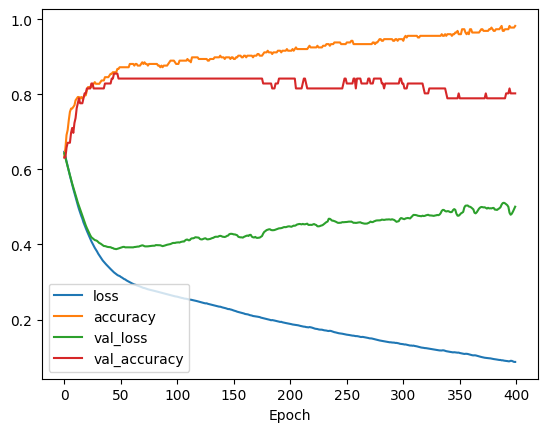

In [13]:
model_performance = pd.DataFrame(model.history.history)
ax = model_performance.plot()
ax.set_xlabel('Epoch')

La imagen muestra que para las épocas iniciales, la exactitud del entremiento y la validación es casi similar. Con algunas épocas más, la `val_accuracy`se vuelve menor que la precisión del entrenamiento.
Este es el signo de sobreajuste en los datos de entrenamiento. Se puede observr la misma tendencia para la pérdida, porque `val_loss` comienza a aumentar después de ciertas épocas. Después de 400 épocas, nuestro modelo está sobreajustado. 

### Abandono y detención anticipada
Los dos métodos comunes utilizados para reducir el sobreajuste son:

1. Adicionar capas de abandono al modelo, o cuando la capa completamente conectada optimiza todos los pesos de cada neurona y por lo tanto, las neuronas establecen una codependencia entre ellas. 
Esto reduce la potencia real de cada neurona, lo que resulta en un sobreajuste de los datos de entrenamiento. Esto se puede abordar silenciando algunas neuronas durante el entrenamiento. Las neuronas se seleccionan aleatoriamente en cada época y se ignoran o se descartan. De esta forma, cada neurona se vuelve más independiente. Los usurarios pueden especificar la cantidad de neuronas que se descartarán para una época.
2. Detección temprana, o los usuarios pueden detener el proceso de capacitación a medida que se sobreadapta gradualmente al realizar un seguimiento del aumento en la pérdida de validadción. 

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
model = Sequential()

# 
model.add(Dense(units=13,activation='relu',input_shape=(13,)))
model.add(Dropout(0.5))
model.add(Dense(units=7,activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 13)                182       
                                                                 
 dropout (Dropout)           (None, 13)                0         
                                                                 
 dense_10 (Dense)            (None, 7)                 98        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                 8         
                                                                 
Total params: 288
Trainable params: 288
Non-trainable params: 0
_________________________________________________________________


La capa de abandono se introduce entre las capas de neuronas desamente conectadas. Las capas de abandono toman un valor entre $0$ y $1$, que indica la fracción de las neuronas que los usuarios han optado por abandonar en cada época.

In [15]:
#ahora veamos la detetención anticipada
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

`EayStopping` usa un argumento para monitorear; el parameto `mode`indica el tipo de seguimiento, por ejemplo, si queremos rastrear la pérdida de validación, nuestro objetivo es que sea mínimo. En caso de quere rastrear la exactitud de la validación, la mantendremos como max. El parametro `patience` es para esperar algunas épocas después de que se cumpla la condición, ya que la curva de pérdida o exactitud de la validación tiene picos. Por lo tanto, podría haber ciertas ganancias o pérdidas, y preferimos que nuestro objeto de parada temprana ignore esos picos intermitentes.

In [16]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=400,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/400
8/8 [==============================] - 1s 27ms/step - loss: 0.7842 - accuracy: 0.4229 - val_loss: 0.7273 - val_accuracy: 0.3553
Epoch 2/400
8/8 [==============================] - 0s 9ms/step - loss: 0.7445 - accuracy: 0.4714 - val_loss: 0.7216 - val_accuracy: 0.3684
Epoch 3/400
8/8 [==============================] - 0s 5ms/step - loss: 0.7530 - accuracy: 0.4185 - val_loss: 0.7166 - val_accuracy: 0.3947
Epoch 4/400
8/8 [==============================] - 0s 12ms/step - loss: 0.7342 - accuracy: 0.4846 - val_loss: 0.7128 - val_accuracy: 0.4079
Epoch 5/400
8/8 [==============================] - 0s 13ms/step - loss: 0.7500 - accuracy: 0.4493 - val_loss: 0.7097 - val_accuracy: 0.3947
Epoch 6/400
8/8 [==============================] - 0s 12ms/step - loss: 0.7428 - accuracy: 0.4493 - val_loss: 0.7071 - val_accuracy: 0.4079
Epoch 7/400
8/8 [==============================] - 0s 5ms/step - loss: 0.7334 - accuracy: 0.4053 - val_loss: 0.7043 - val_accuracy: 0.4342
Epoch 8/400
8/8 [======

Podemos observar que el modelo se detuvo después de 163 épocas. Con la parada temprana podemos poner una gran cantidad de épocas, ya que el moelo dejará de entrenarse automáticamente en el momento en que comience a sobreajustar.


Text(0.5, 0, 'Epoch')

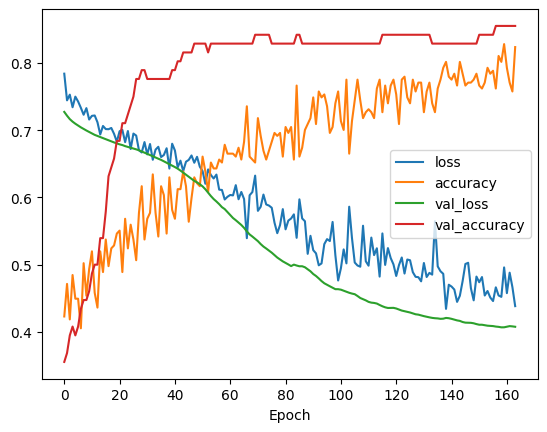

In [17]:
model_performance = pd.DataFrame(model.history.history)
ax = model_performance.plot()
ax.set_xlabel('Epoch')

Ahora podemos observar que el modelo de entrenamiento es terminado antes del sobreajuste, mas especificamente, la pérdida de validación está por debajo de la pérdida de entrenamiento y la exactitud está por encima de la precisión del entrenamiento.

### Evaluación de modelo
El objeto `model`tiene el método `predict_classes`, donde podemos pasar el conjunto de prueba para predicción. Usaremos `classification_report`y `confusion_matrix` de sklearns para la evaluación del modelo.

In [18]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

3/3 [==============================] - 0s 2ms/step


In [19]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[25  8]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.83      0.93      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.84      0.85        76
weighted avg       0.86      0.86      0.85        76



El modelo tiene una Exactitud del 84% que es mucho más alto de la tasa de exactitud base de este modelo que tiene 56%.

### Predicción de nueva instancia
El método `predict` de este modelo produce la probabilidad de clasificación. Antes del pronóstico, los nuevos datos deben normalizarse a través del objeto `sc`, que se utiliza para transformar las características independientes.

In [20]:
new_data=dataset.iloc[2,:-1].values
model.predict(sc.transform([new_data]))

1/1 [==============================] - 0s 31ms/step


array([[0.9200589]], dtype=float32)

En este caso, alcazamos la probabilidas del 0.91 de pertenecer a la clase 1. Podemos producir la clase usando el método `predict_classes`.

### Predicción del cáncer de mama mediante redes neuronales
Vamos a utilizar de nuevo el conjunto de datos de diagnostico para el cáncer de mama. Este contiene 30 características que se deriven de imágenes de células de tumores de mama benignos y maligos. 

Este tiene 569 observaciones, donde 357 casos son benignos y 212 casos son tumores malignos.  Por lo tanto, la exactitud de referencia del modelo es de 62.7%. Recordemos que no tenismos valores nulos, pero tenismos dos columas no deseadas (es decir, 'id' y 'Unnamed:32') que se eliminarán, tmabien tenemos clases en tipo cadena, por lo que las convertiremos en tipo numérico etiquetado 'B' como '0' y 'M' como 1.

In [44]:
dataset = pd.read_csv('../Datos/Breast_Cancer.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [45]:
dataset.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [46]:
dataset['diagnosis'] = dataset['diagnosis'].map({'B':0,'M':1})

<Axes: xlabel='diagnosis', ylabel='count'>

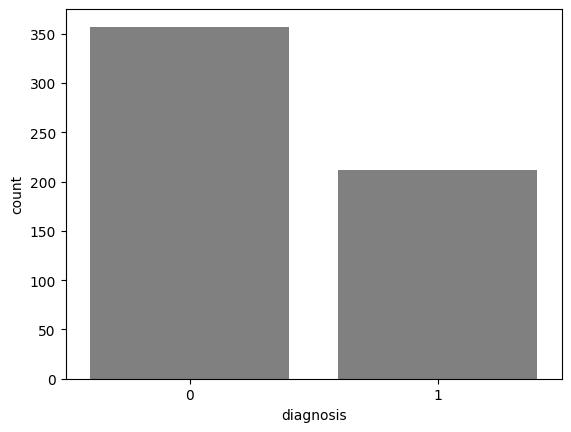

In [49]:
sns.countplot(x='diagnosis',data=dataset,color='gray')

In [50]:
dataset.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Separamos el dataset en variables dependiente e independientes 

In [51]:
X = dataset.iloc[:,1:].values
y =dataset.iloc[:,0].values

### Escalamos los datos

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_norm = sc.fit_transform(X)

### Dividir el datset en el conjunto de entranamiento y el de prueba

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)

In [54]:
X_train.shape

(455, 30)

### Creamos el modelo

En este punto, construiremos tres capas. La primera capa tiene 30 neuronas; la segunda capa tiene 15 neuronas; la última capa tiene una sola neurona con una funsción de activación sigmoid, ya que es un problmea de clasificación binaria.
Vamos a agregar capas de abandono con la probabilidad de deserción de neuronas indicada como 0.5.
Mientras compilamos el modelo, usamos “binary_crossentropy” como función de pérdida y “rmsprop” como optimizador.


In [55]:
model = Sequential()

# 
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])


In [56]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=X_train, 
          y=y_train, 
          epochs=400,
          batch_size= 64,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/400
8/8 [==============================] - 1s 26ms/step - loss: 34.6918 - accuracy: 0.4484 - val_loss: 5.3612 - val_accuracy: 0.3421
Epoch 2/400
8/8 [==============================] - 0s 5ms/step - loss: 26.9711 - accuracy: 0.4835 - val_loss: 3.9293 - val_accuracy: 0.3421
Epoch 3/400
8/8 [==============================] - 0s 14ms/step - loss: 23.6243 - accuracy: 0.4330 - val_loss: 1.1875 - val_accuracy: 0.3596
Epoch 4/400
8/8 [==============================] - 0s 13ms/step - loss: 17.1530 - accuracy: 0.4835 - val_loss: 0.6236 - val_accuracy: 0.3684
Epoch 5/400
8/8 [==============================] - 0s 12ms/step - loss: 13.6684 - accuracy: 0.4549 - val_loss: 0.6163 - val_accuracy: 0.3684
Epoch 6/400
8/8 [==============================] - 0s 13ms/step - loss: 10.3416 - accuracy: 0.5165 - val_loss: 0.6297 - val_accuracy: 0.3684
Epoch 7/400
8/8 [==============================] - 0s 11ms/step - loss: 9.7812 - accuracy: 0.5231 - val_loss: 0.6304 - val_accuracy: 0.3684
Epoch 8/400
8/8

Ahora trazaremos los datos de pérdida de validadción y pérdida de entrenamiento para confirmar si el modelo está sobreajustado o no.

Text(0.5, 0, 'Epoch')

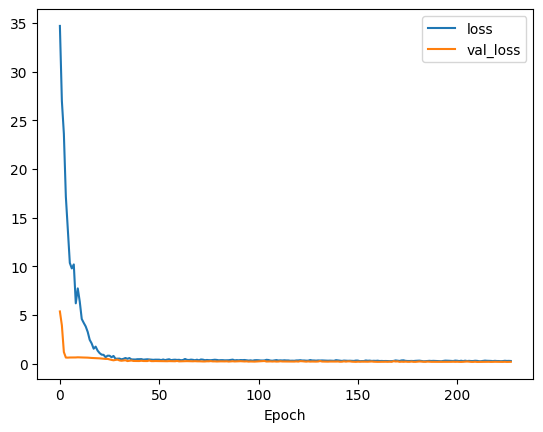

In [57]:
model_loss = pd.DataFrame(model.history.history)
ax = model_loss[['loss','val_loss']].plot()
ax.set_xlabel('Epoch')

El gráfico muestra que lapérdida de entranamiento y validación son casi similares, lo que implica que el modelo no está sobreajustado.

# Model Evaluation

In [58]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

4/4 [==============================] - 0s 2ms/step
[[70  2]
 [ 5 37]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        72
           1       0.95      0.88      0.91        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



El modelo logro una tasa de exactitud del 94%.

In [ ]:
# Obtener los pesos de las variables
weights_input = model.layers[0].get_weights()
weights_output = model.layers[1].get_weights()

# Imprimir los pesos
print("Pesos de la capa de entrada:")
print(weights_input[0])  # Pesos de las variables de entrada
print("Pesos del sesgo de la capa de entrada:")
print(weights_input[1])  # Pesos del sesgo de la capa de entrada

print("Pesos de la capa de salida:")
print(weights_output[0])  # Pesos de las variables de salida
print("Pesos del sesgo de la capa de salida:")
print(weights_output[1])  # Pesos del sesgo de la capa de salida